# <center> **Foundations of Applied Machine Learning**
## <center> Summer 2025

### <center> **Prof. Bahram Mobasher**
### <center> Teaching Assistant: **Sanaz Imanlou** | email: *sanaz.imanlou@email.ucr.edu* | [Course webpage](https://github.com/sanaz007/PHYS_243)
### <center> Week 7 : K-Nearest Neighbour



In [105]:
import numpy as np 
import random 
import matplotlib.pyplot as plt

# font parameters dictionary
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18,}


# figure parameters dictionary
figure = {"figsize" : (6,6),
          "dpi" : 120,
          "facecolor" : "w", 
          "edgecolor" : "k",}



# use LaTeX fonts in the plot
plt.rc('text', usetex=True)

# ticks settings
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

# axes setting
plt.rc('axes', titlesize=22, labelsize=18)     # fontsize of the axes title, labels

# Set the font parameters
plt.rc('font', **font) 

# Set the figure parameters 
plt.rc("figure", **figure)

In [106]:
def Minkowski_d(x1, x2, p=2):
    """ Function from L^p
    This is a function for defining a general distance measure between any 
    given N-dimensional vectors:     x1, x2
    
    INPUT:
    ------
           x1 (list or array of floats) : First vector
           x2 (list or array of floats) : Second vector
           p (float) : The power in our Minkowski definition 
    
    OUTPUT:
    -------
            (float) : The Minkowski distance of power p
                      between x1 and x2 
    """
    
    # Assuming we have a list or an array of numbers
    # Creating a variable for summation
    _sum_=0
    # Now we go through every element on the arrays and
    # will find the distance and add them  
    for x1_, x2_ in zip(x1, x2):
        dummy = pow(abs(x1_-x2_), p)
        _sum_+=dummy
    distance = pow(_sum_, 1/p)
    return distance

In [107]:
class Point:
    def __init__(self, features, label = None, \
                 name = "Unassigned"):
        self.name = name
        self.features = features
        self.label = label
        
    # get the dimensionality of the features
    def get_dimension(self):
        return len(self.features)
    
    def get_features(self):
        return self.features
    
    def get_label(self):
        return self.label
    
    def get_name(self):
        return self.name
    
    def distance_Minkowski(self, other, p = 2):
        return Minkowski_d(self.features, other.get_features(), p)
    distance_Minkowski.__doc__ = Minkowski_d.__doc__
    
    def get_norm(self, p = 2):
        _zero_=[0 for _ in range(self.get_dimension())]
        return Minkowski_d(self.features, _zero_, p)
    
    def __str__(self):
        return self.name +" : "+ str(self.features) + ' : '\
               + str(self.label)

## K-Nearest Neighbours: (KNN)

This is very similar to nearest neighbour algrithm but this time we are 
looking for K nearest neighbours and to take the most occured label of those K neighbours as your prediction for new data. 

All that said, you should remember that by increasing K you are making the size of your "true" labes more relevant. Which will increase your error in predicting labels for new data.
   

Let's look at another famous dataset called [iris plants dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/).

First, let's read the information file called `iris.names`:

In [108]:
with open("iris.names", "r") as info_file:
    lines = info_file.readlines()
    info_file.close()

In [109]:
lines[:8]

['1. Title: Iris Plants Database\n',
 '\tUpdated Sept 21 by C.Blake - Added discrepency information\n',
 '\n',
 '2. Sources:\n',
 '     (a) Creator: R.A. Fisher\n',
 '     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)\n',
 '     (c) Date: July, 1988\n',
 '\n']

In [110]:
lines[-20:]

['7. Attribute Information:\n',
 '   1. sepal length in cm\n',
 '   2. sepal width in cm\n',
 '   3. petal length in cm\n',
 '   4. petal width in cm\n',
 '   5. class: \n',
 '      -- Iris Setosa\n',
 '      -- Iris Versicolour\n',
 '      -- Iris Virginica\n',
 '\n',
 '8. Missing Attribute Values: None\n',
 '\n',
 'Summary Statistics:\n',
 '\t         Min  Max   Mean    SD   Class Correlation\n',
 '   sepal length: 4.3  7.9   5.84  0.83    0.7826   \n',
 '    sepal width: 2.0  4.4   3.05  0.43   -0.4194\n',
 '   petal length: 1.0  6.9   3.76  1.76    0.9490  (high!)\n',
 '    petal width: 0.1  2.5   1.20  0.76    0.9565  (high!)\n',
 '\n',
 '9. Class Distribution: 33.3% for each of 3 classes.']

In [111]:
features_by_index = {
    
    0 : "sepal lenght",
    1 : "sepal width",
    2 : "petal lenght",
    3 : "petal width",
    4 : "class",
    
}

Now let's look at the data itself from the file `iris.data`:

In [112]:
with open("iris.data", "r") as data_file:
    data_lines = data_file.readlines()
    data_file.close()

In [113]:
data_lines[:5]

['5.1,3.5,1.4,0.2,Iris-setosa\n',
 '4.9,3.0,1.4,0.2,Iris-setosa\n',
 '4.7,3.2,1.3,0.2,Iris-setosa\n',
 '4.6,3.1,1.5,0.2,Iris-setosa\n',
 '5.0,3.6,1.4,0.2,Iris-setosa\n']

In [114]:
_data_ = []

for d_line in data_lines:
    
    # seperating the words (strings) by comma ","
    _line_=d_line.split(",")
   
   
    # reading the data and turning them into their correct types
    _line_f = [float(e) for e in _line_[:-1]]
    _line_f.append(_line_[-1][:-1])
    
    # putting the data together
    _data_.append(_line_f)

In [115]:
_data_[:4]

[[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
 [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
 [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
 [4.6, 3.1, 1.5, 0.2, 'Iris-setosa']]

In [116]:
_data_[-4:]

[[6.3, 2.5, 5.0, 1.9, 'Iris-virginica'],
 [6.5, 3.0, 5.2, 2.0, 'Iris-virginica'],
 [6.2, 3.4, 5.4, 2.3, 'Iris-virginica'],
 [5.9, 3.0, 5.1, 1.8, 'Iris-virginica']]

In [117]:
_data_copy = _data_[:-1]

In [118]:
original_data_points = []

for i, _d_ in enumerate(_data_[:-1]):
    _p_ = Point(_d_[:-1], label = _d_[-1], name=str(i+1))
    original_data_points.append(_p_)

Now we have our data in form of a list of `Point` objects. But before looking at the data set let's devide the dataset into trainging and test set. We should do this to avoid overfitting or creating bias toward a particular model without having evidence.

In [119]:
def devide_dataset(_data_, training_fraction = 0.8, seed = random.randint(1,100000)):
    """
    This is a general function to devide a given dataset into 
    training set and test set.
    
    
    INPUT:
    ------
           _data_ (list or an array) : contains data 
           training_fraction (float) : what fraction of data goes
                                       to training set.
                                       
    OUTPUT:
    ------
           training_dataset (list) : contains the training data
           test_dataset (list) : contains the test data
           
           
             
    """
    _len_ = len(_data_)+1
    _number_of_data_in_training_=int(round(training_fraction*_len_))

    random.seed(seed)
    sample_indices= random.sample(range(len(_data_)), _number_of_data_in_training_)
    
    test_dataset = []
    training_dataset = []
    
    for i, point in enumerate(_data_):
        if i in sample_indices:
            training_dataset.append(point)
        else:
            test_dataset.append(point)


    return training_dataset, test_dataset

In [120]:
data_points, test_dataset = devide_dataset(original_data_points, training_fraction=0.8, seed = 1000)

In [121]:
x, y = [], []

for _p_ in data_points:
    _x_ = _p_.get_features()[0]
    _y_ = _p_.get_features()[1]
    
    

In [122]:
_colors_ = []
_labels_ = []

for point in data_points:
    _label_ = point.get_label()
    _labels_.append(_label_)

_label_copy = _labels_
# Getting unique labels with a simple trick of using "set" function ----> read the "set" doc by set.__doc__ 
unique_labels = list(set(_labels_))
    
print(unique_labels)


for _label_ in _labels_:
    if _label_ == unique_labels[0]:
        _colors_.append("r")
        
    if _label_ == unique_labels[1]:
        _colors_.append("g")

    if _label_ == unique_labels[2]:
        _colors_.append("b")

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [123]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

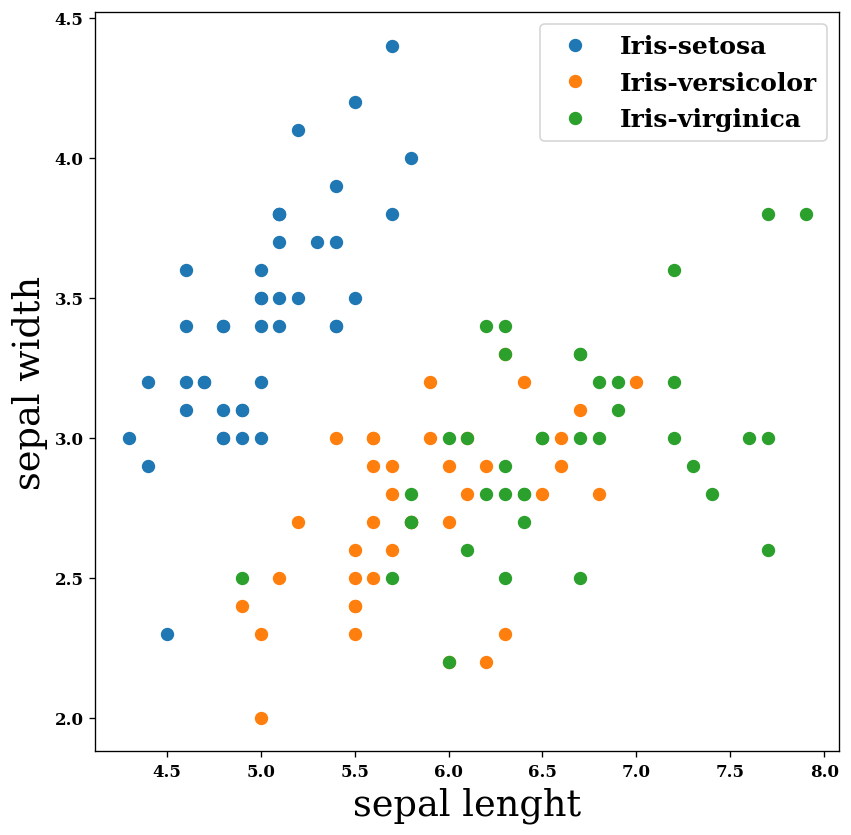

In [124]:
iris_plot = plt.figure(figsize=(8,8))

x, y = [], []

for point in data_points:
    x.append(point.get_features()[0]), 
    y.append(point.get_features()[1]),

_x_, _y_ = [[], [], []], [[], [], []]
    
x = np.array(x)
y = np.array(y)
_labels_=np.array(_labels_)


for i, _label_ in enumerate(unique_labels):
    _x_[i] = x[_labels_==_label_]
    _y_[i] = y[_labels_==_label_]

plt.plot(_x_[0], _y_[0], ".", markersize=14, label=unique_labels[0])
plt.plot(_x_[1], _y_[1], ".", markersize=14, label=unique_labels[1])
plt.plot(_x_[2], _y_[2], ".", markersize=14, label=unique_labels[2])


plt.xlabel(features_by_index[0], fontsize = 22)
plt.ylabel(features_by_index[1], fontsize = 22)

plt.legend(fontsize=15)

plt.show()

From the above plot you can see the sepal weight and lenght do not separate these groups. So let's look at the rest of the data:

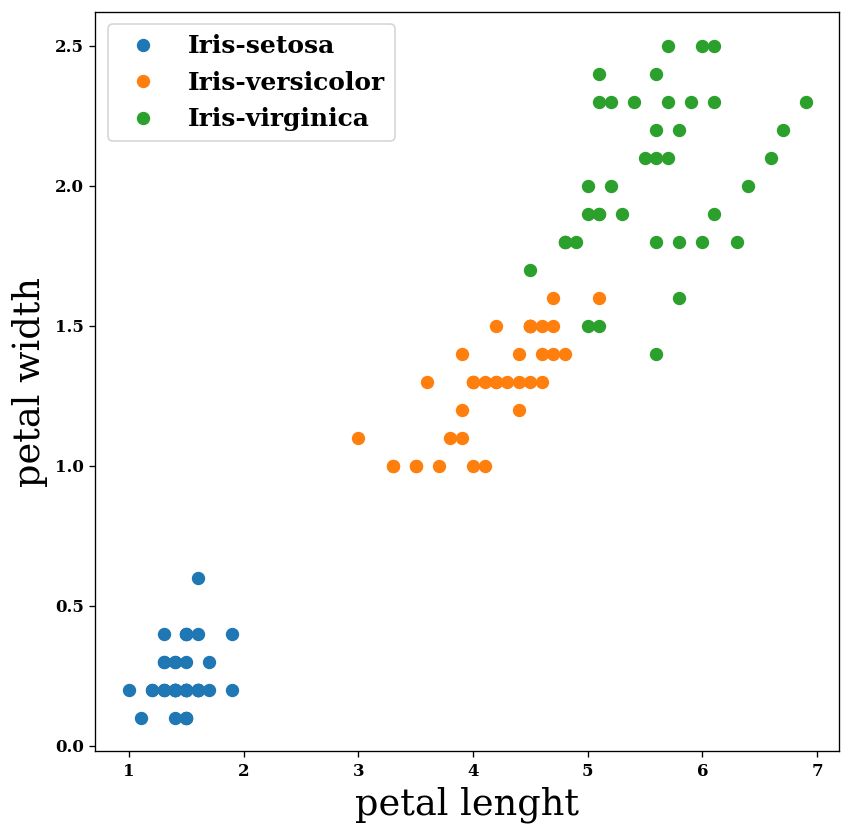

In [125]:
iris_plot_2 = plt.figure(figsize=(8,8))

x, y = [], []

for point in data_points:
    x.append(point.get_features()[2]), 
    y.append(point.get_features()[3]),

_x_, _y_ = [[], [], []], [[], [], []]
    
x = np.array(x)
y = np.array(y)
_labels_=np.array(_labels_)


for i, _label_ in enumerate(unique_labels):
    _x_[i] = x[_labels_==_label_]
    _y_[i] = y[_labels_==_label_]

plt.plot(_x_[0], _y_[0], ".", markersize=14, label=unique_labels[0])
plt.plot(_x_[1], _y_[1], ".", markersize=14, label=unique_labels[1])
plt.plot(_x_[2], _y_[2], ".", markersize=14, label=unique_labels[2])


plt.xlabel(features_by_index[2], fontsize = 22)
plt.ylabel(features_by_index[3], fontsize = 22)

plt.legend(fontsize=15)

plt.show()

This is much better! we can see how petal can separate them into different groups.

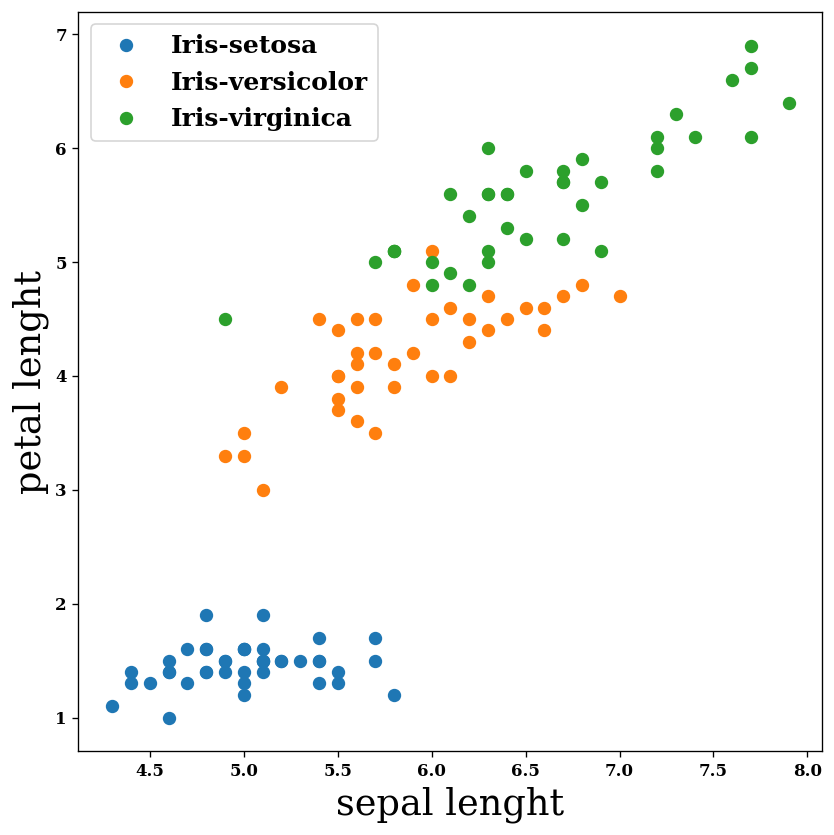

In [126]:
iris_plot_2 = plt.figure(figsize=(8,8))

x, y = [], []

for point in data_points:
    x.append(point.get_features()[0]), 
    y.append(point.get_features()[2]),

_x_, _y_ = [[], [], []], [[], [], []]
    
x = np.array(x)
y = np.array(y)
_labels_=np.array(_labels_)


for i, _label_ in enumerate(unique_labels):
    _x_[i] = x[_labels_==_label_]
    _y_[i] = y[_labels_==_label_]

plt.plot(_x_[0], _y_[0], ".", markersize=14, label=unique_labels[0])
plt.plot(_x_[1], _y_[1], ".", markersize=14, label=unique_labels[1])
plt.plot(_x_[2], _y_[2], ".", markersize=14, label=unique_labels[2])


plt.xlabel(features_by_index[0], fontsize = 22)
plt.ylabel(features_by_index[2], fontsize = 22)

plt.legend(fontsize=15)

plt.show()

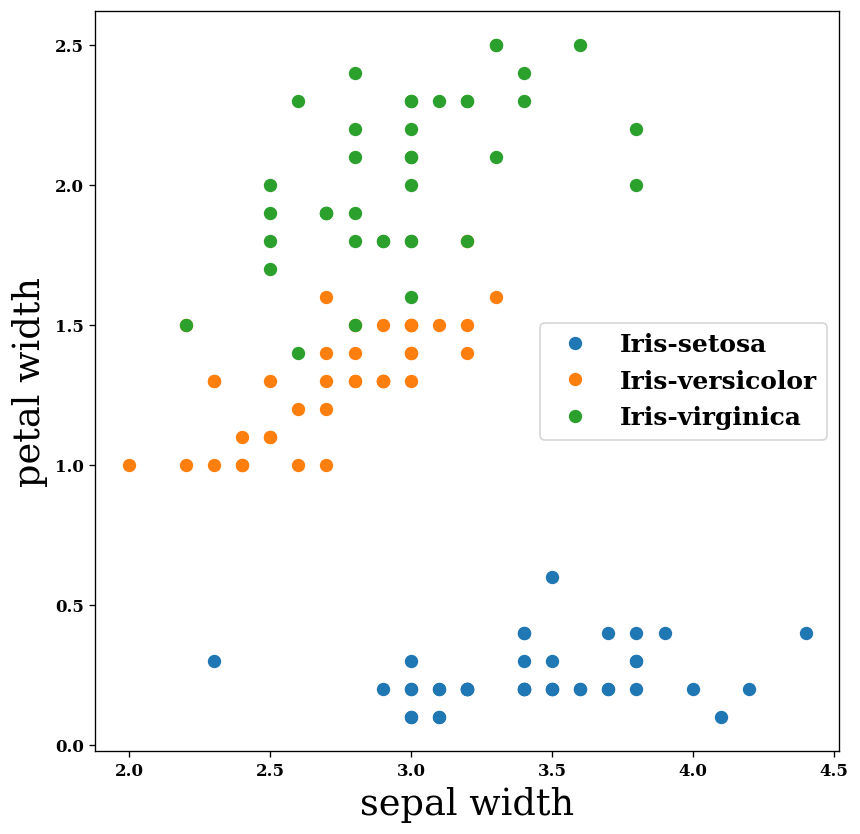

In [127]:
iris_plot_3 = plt.figure(figsize=(8,8))

x, y = [], []

for point in data_points:
    x.append(point.get_features()[1]), 
    y.append(point.get_features()[3]),

_x_, _y_ = [[], [], []], [[], [], []]
    
x = np.array(x)
y = np.array(y)
_labels_=np.array(_labels_)


for i, _label_ in enumerate(unique_labels):
    _x_[i] = x[_labels_==_label_]
    _y_[i] = y[_labels_==_label_]

plt.plot(_x_[0], _y_[0], ".", markersize=14, label=unique_labels[0])
plt.plot(_x_[1], _y_[1], ".", markersize=14, label=unique_labels[1])
plt.plot(_x_[2], _y_[2], ".", markersize=14, label=unique_labels[2])


plt.xlabel(features_by_index[1], fontsize = 22)
plt.ylabel(features_by_index[3], fontsize = 22)

plt.legend(fontsize=15)

plt.show()

Now let's implement the K-Nearest Neighbours algorithm: 

In [ ]:
def K_Nearest_Neighbours(new_point, points, k, verbose = False):
    distances = []
    
    for point in points:
        distances.append((point.distance_Minkowski(new_point), point))
    
    sorted_by_distance = sorted(distances, key= lambda x : x[0])
    k_neighbours= [sorted_by_distance[i][1] for i in range(k)]
        

    if verbose:
        print([sorted_by_distance[i][0] for i in range(k)])
    
    k_neighbours_labels = [k_neighbours[i].get_label() for i in range(k)]
    most_frequent_label = max(set(k_neighbours_labels), key=k_neighbours_labels.count)
    
    new_point_copy = Point(new_point.get_features(), label = most_frequent_label)
    
    if verbose:
        print(k_neighbours_labels)
    
    return most_frequent_label, new_point_copy

In [128]:
new_point = Point([6, 3, 4.4, 2.5])

Remember that we are looking through all of the features:

In [129]:
_label_, _updated_point_ = K_Nearest_Neighbours(new_point, data_points, 7, True)

[0.7615773105863903, 0.8062257748298546, 0.8366600265340752, 0.8544003745317529, 0.8660254037844386, 0.9746794344808961, 0.989949493661166]
['Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica']


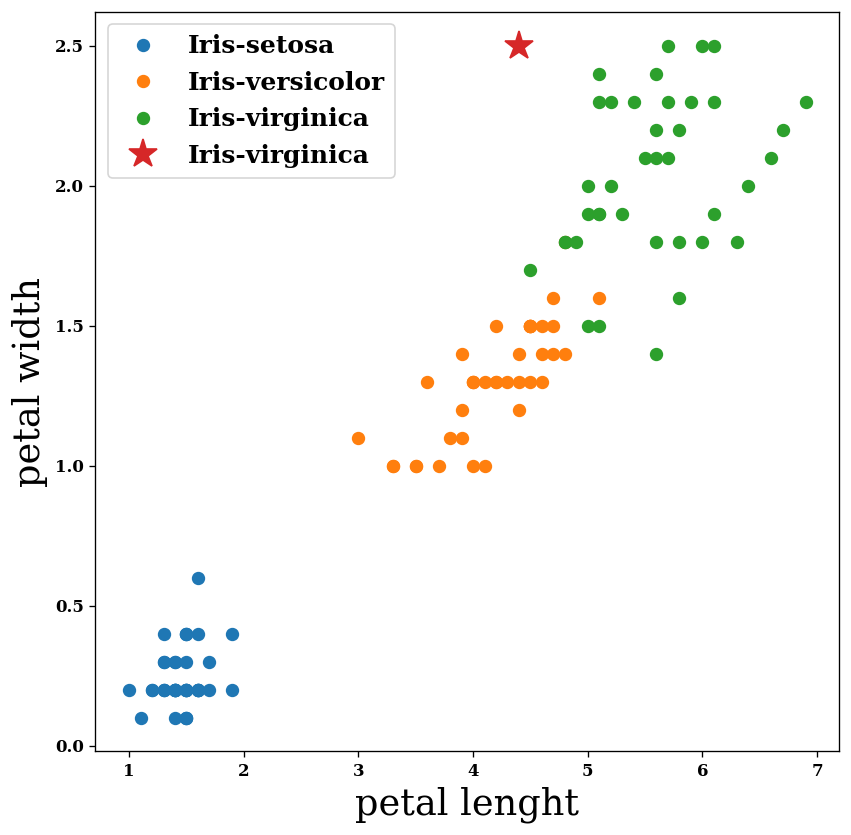

In [130]:
iris_plot_2 = plt.figure(figsize=(8,8))

x, y = [], []

for point in data_points:
    x.append(point.get_features()[2]), 
    y.append(point.get_features()[3]),

_x_, _y_ = [[], [], []], [[], [], []]
    
x = np.array(x)
y = np.array(y)
_labels_=np.array(_labels_)


for i, _label_ in enumerate(unique_labels):
    _x_[i] = x[_labels_==_label_]
    _y_[i] = y[_labels_==_label_]

plt.plot(_x_[0], _y_[0], ".", markersize=14, label=unique_labels[0])
plt.plot(_x_[1], _y_[1], ".", markersize=14, label=unique_labels[1])
plt.plot(_x_[2], _y_[2], ".", markersize=14, label=unique_labels[2])

plt.plot(new_point.get_features()[2], new_point.get_features()[3], '*', markersize = 18, label=_label_)

plt.xlabel(features_by_index[2], fontsize = 22)
plt.ylabel(features_by_index[3], fontsize = 22)

plt.legend(fontsize=15)

plt.show()

It seems that our code is working fine!

Let's run the code on the test data set dataset:

In [131]:
def run_test(test_data, training_data, k):
    updated_test_data = []
    
    truely_assigned = 0
    
    for point in test_data:
        _label_, new = K_Nearest_Neighbours(point, training_data, k)
        updated_test_data.append(new)
        
        if new.get_label() == point.get_label():
            truely_assigned+=1
        
    
    return updated_test_data, truely_assigned/len(test_data)

Now that we have a function for let's look at the number of times we are correctly categorizing plants:

In this part we are going to see whether if our score (sensitivity) increases with the fraction of data in the training set:

In [132]:
_t_span_ = np.linspace(0.05, 0.9, 30)
K = 5
accuracy =np.zeros(len(_t_span_))

for i, _t_ in enumerate(_t_span_):
    training, test = devide_dataset(original_data_points, training_fraction=_t_)
    assigned_test_data, accuracy[i] = run_test(test, training, K) 

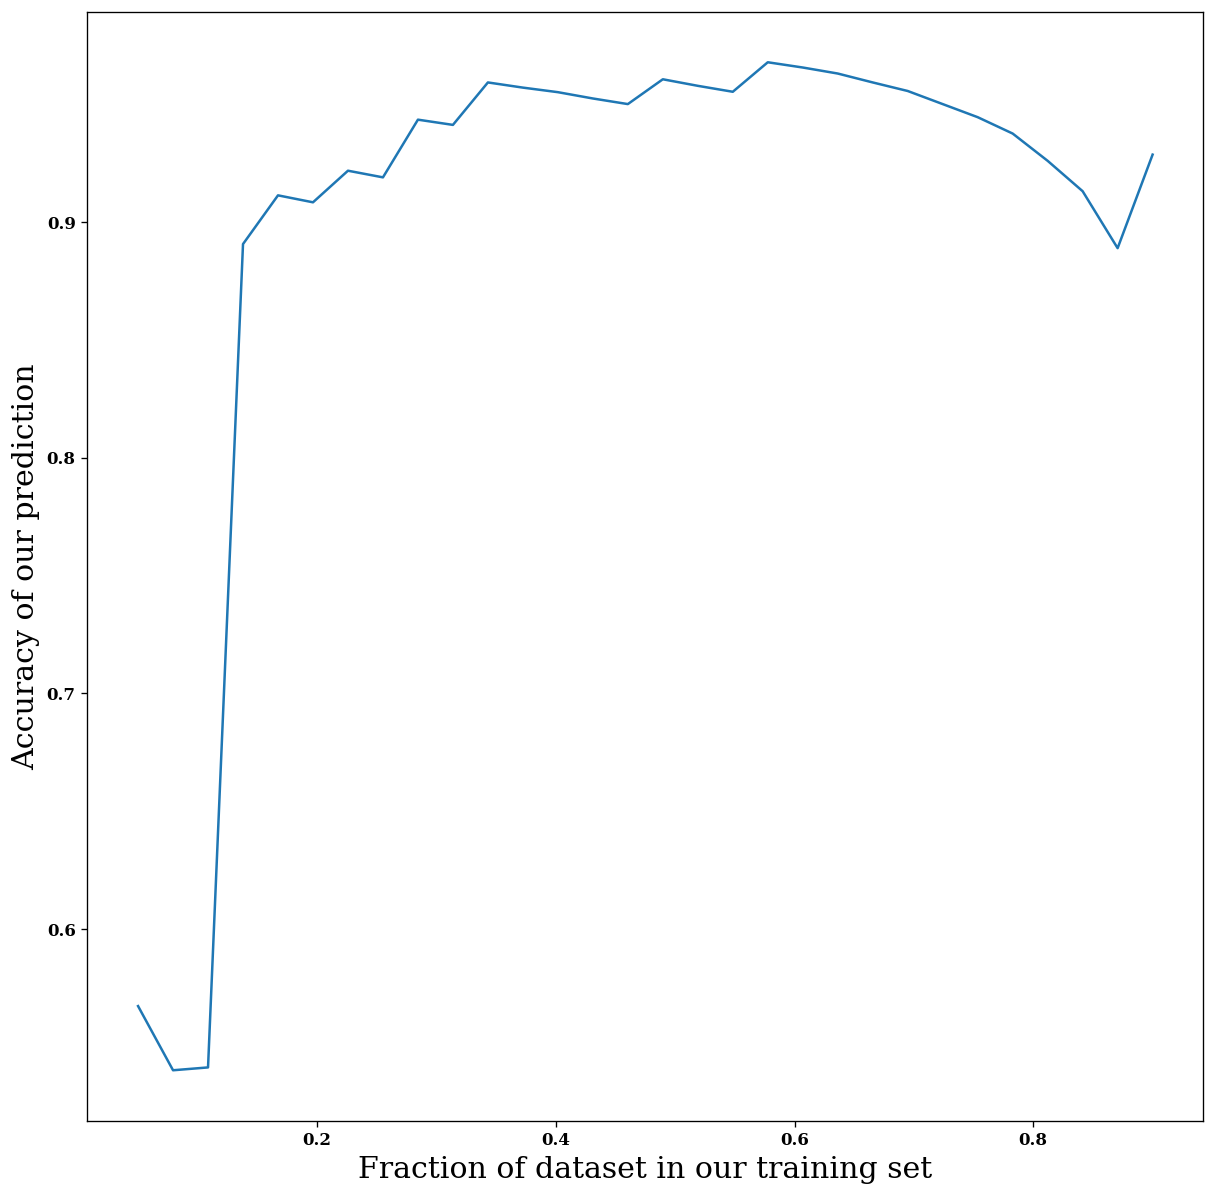

In [134]:
fig_training_frac_accuracy = plt.figure(figsize=(12, 12))

plt.plot(_t_span_, accuracy)

plt.xlabel(r"Fraction of dataset in our training set", fontsize = 18)
plt.ylabel(r"Accuracy of our prediction", fontsize = 18)

plt.show()

In [135]:
_t_1, _acc_1 = _t_span_, accuracy

You can see the performance of our model is not increase with adding more data after about 0.2 fraction.

Now let's look at the performance of our model with increasing number of neighbours:

In [136]:
frac = 0.7

training, test = devide_dataset(original_data_points, training_fraction=frac)

_k_span_ = np.arange(1, len(training), 1)

accuracy=np.zeros(len(_k_span_))

for i, _k_ in enumerate(_k_span_):
    assigned_test_data, accuracy[i] = run_test(test, training, _k_) 

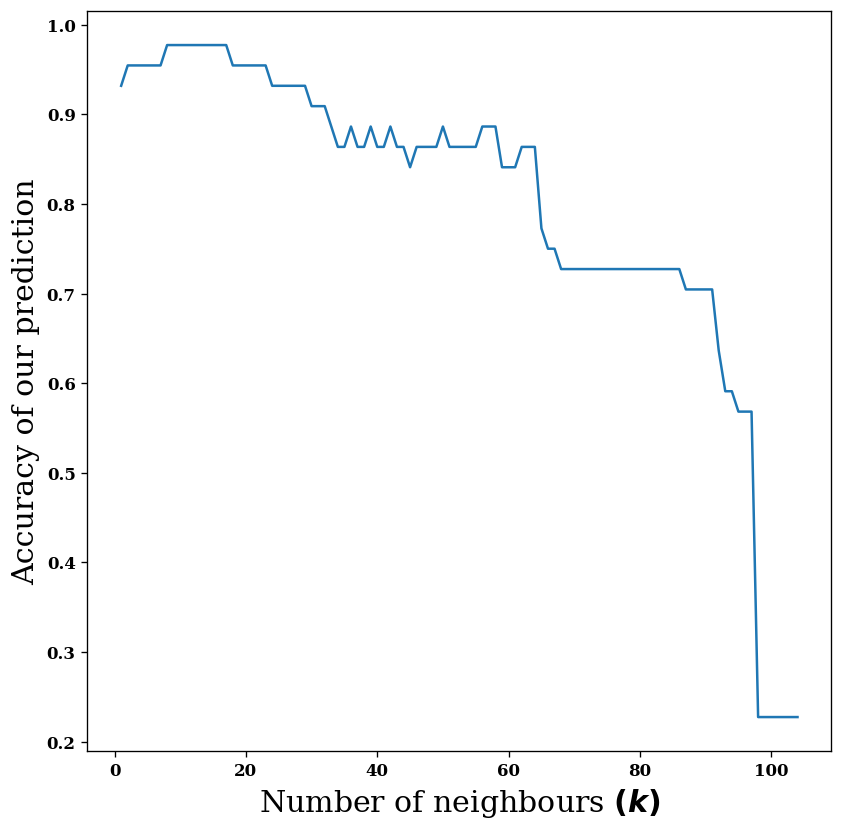

In [137]:
fig_training_frac_accuracy = plt.figure(figsize=(8, 8))

plt.plot(_k_span_, accuracy)

plt.xlabel(r"Number of neighbours $(k)$", fontsize = 18)
plt.ylabel(r"Accuracy of our prediction", fontsize = 18)

plt.show()

As you can see increasing the number of neighbours does not increase our performance after $(k>10)$ and our performance actually goes down!

In [138]:
k_2, _acc_2 = _k_span_, accuracy

## Conclusion:

* Increasing the fraction of the training set does not always increase our performance.
* Increasing the number of neighbours to consider, does not increase our performance and it actually can makes our prediction to be worse! 

In all of our exampes we considered, the number of points in each class were the same. Now let's take a look at a case in which one class is dominating:

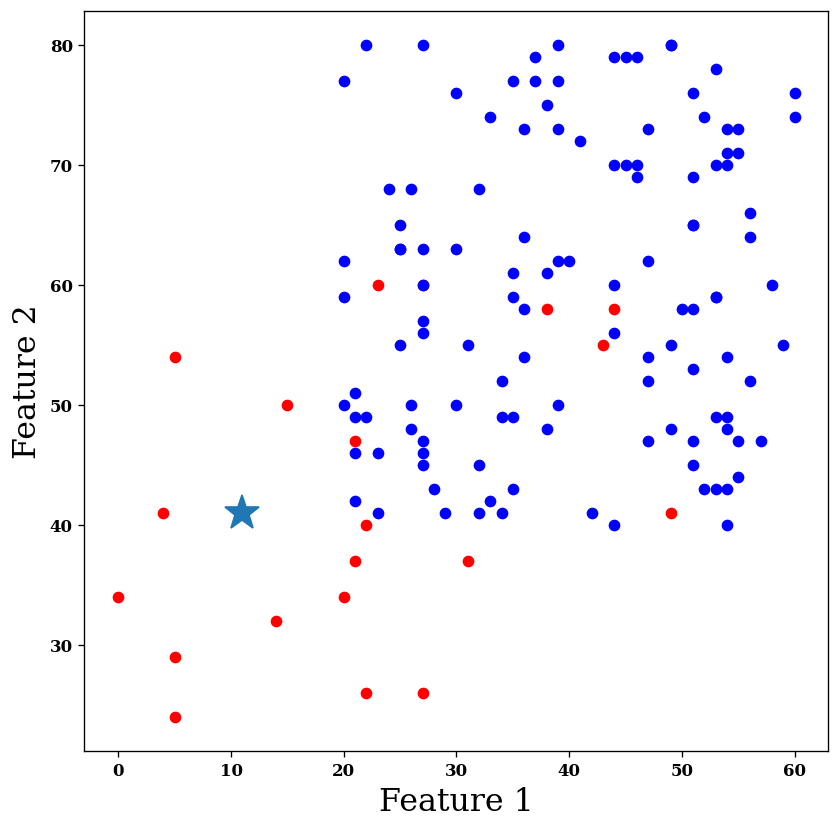

In [139]:
_fig_cl_1 = plt.figure(figsize=(8,8))

group_1, group_2 = [], []
group = []

random.seed(50)

new_point = Point([11, 41])

for i in range(20):
    _p_ = Point([random.randint(0, 50), random.randint(20, 60)], label="red")
    group_1.append(_p_)
    plt.scatter(_p_.get_features()[0], _p_.get_features()[1], color = "r")
    

for i in range(120):
    _p_ = Point([random.randint(20, 60), random.randint(40, 80)], label="blue")
    group_2.append(_p_)
    plt.scatter(_p_.get_features()[0], _p_.get_features()[1], color = "b")

group = group_1
group.extend(group_2)

plt.plot(new_point.get_features()[0], new_point.get_features()[1], "*", markersize = 22)

plt.xlabel(r"Feature 1", fontsize = 19)
plt.ylabel(r"Feature 2", fontsize = 19)

plt.show()

In [140]:
k_span = np.arange(1, 40)
labels = []
labels_numeric = []


for k in k_span:
    label, _ = K_Nearest_Neighbours(new_point, group, k)
    labels.append(label)
    
    if label=="red":
        labels_numeric.append(1)
    
    else:
        labels_numeric.append(-1)

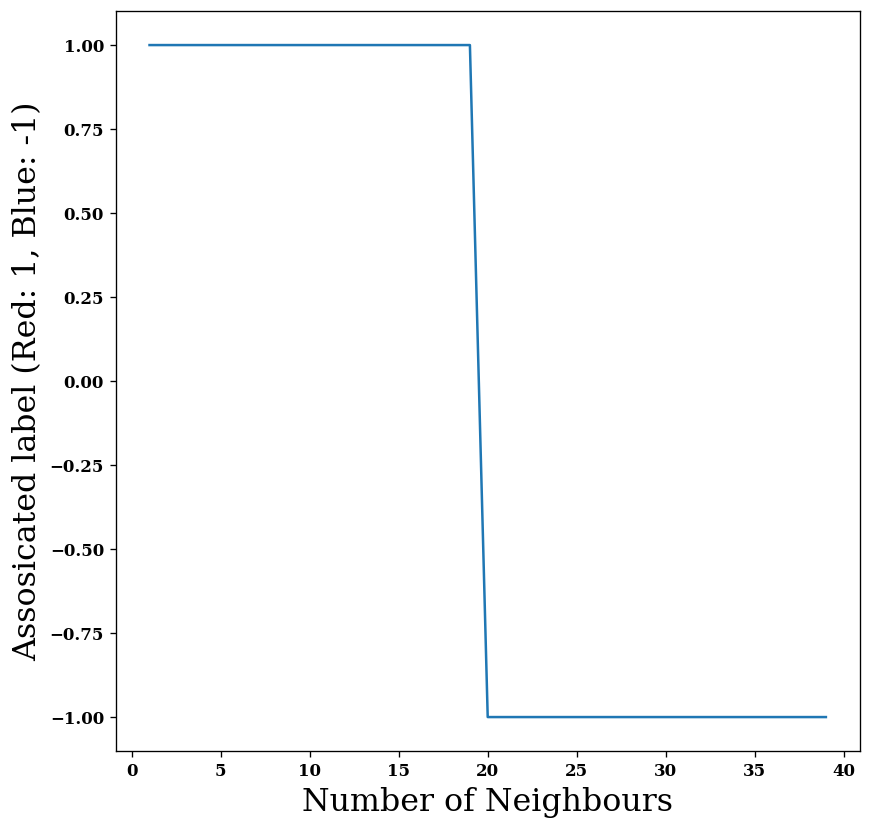

In [141]:
plt.figure(figsize=(8,8))

plt.plot(k_span, labels_numeric)

plt.xlabel(r"Number of Neighbours", fontsize = 19)
plt.ylabel(r"Assosicated label (Red: 1, Blue: -1)", fontsize = 19)


plt.show()

You can see when the number of instances in a class dominate another class/classes we need to be extra careful since we can visually see that our new data point is closer to being red but after about ~20 neighbours we are going to make many of our neighbours to be in the dominated class which make our prediction wrong!


Therefore, you should always consider the size of the classes and dataset before finding the right k. And we should always check our performance as well.

Let's use `scikit-learn` for performing the same KNN algorithm:

In [142]:
from sklearn.preprocessing import LabelEncoder

Here we using `LabelEncoder` to change the labels into numbers:

In [143]:
_label_copy = [_data_copy[i][-1] for i in range(len(_data_copy))]

LE = LabelEncoder()

LE.fit(_label_copy)
print(list(LE.classes_))


normalized_labels = LE.transform(_label_copy)
print(len(normalized_labels))

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
149


In [144]:
from sklearn.neighbors import KNeighborsClassifier

DATA = _data_copy
DATA = [np.array(DATA[i][:-1]) for i in range(len(DATA))]

DATA = np.array(DATA)
DATA.shape

(149, 4)

Now let's split our dataset into a training and test sets:

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    DATA, normalized_labels, test_size=0.5, random_state=1000
)

In [146]:
KNN = KNeighborsClassifier(n_neighbors=7)

KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [147]:
indices = KNN.predict(X_test)

prediction = [LE.classes_[i] for i in indices]

In [148]:
KNN.score(X_test, y_test)

0.96

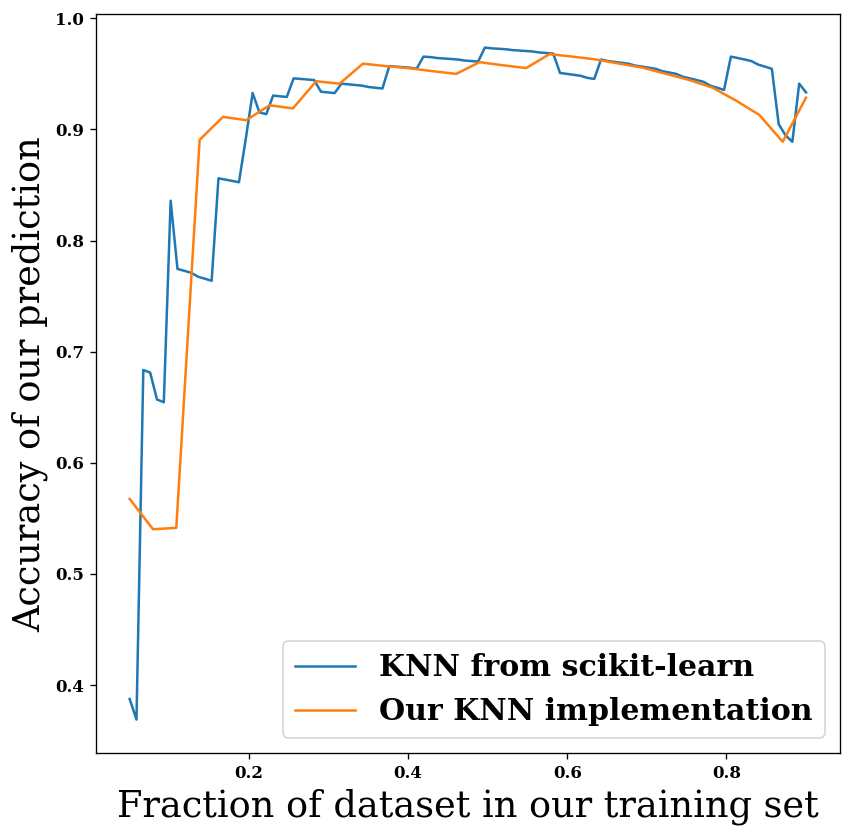

In [149]:
_frac_ = np.linspace(0.05, 0.9, 100)
accuracy = np.zeros(len(_frac_))

for i, _f_ in enumerate(_frac_):
    X_train, X_test, y_train, y_test = train_test_split(
    DATA, normalized_labels, test_size=1-_f_, random_state=150
    )
    
    KNN = KNeighborsClassifier(n_neighbors=5, algorithm="brute")
    KNN.fit(X_train, y_train)
    
    accuracy[i] = KNN.score(X_test, y_test)

fig_training_frac_accuracy = plt.figure(figsize=(8, 8))

plt.plot(_frac_, accuracy, label="KNN from scikit-learn")

plt.plot(_t_1, _acc_1, label="Our KNN implementation")
    
plt.xlabel(r"Fraction of dataset in our training set", fontsize = 22)
plt.ylabel(r"Accuracy of our prediction", fontsize = 22)


plt.legend(fontsize=18)
plt.show()

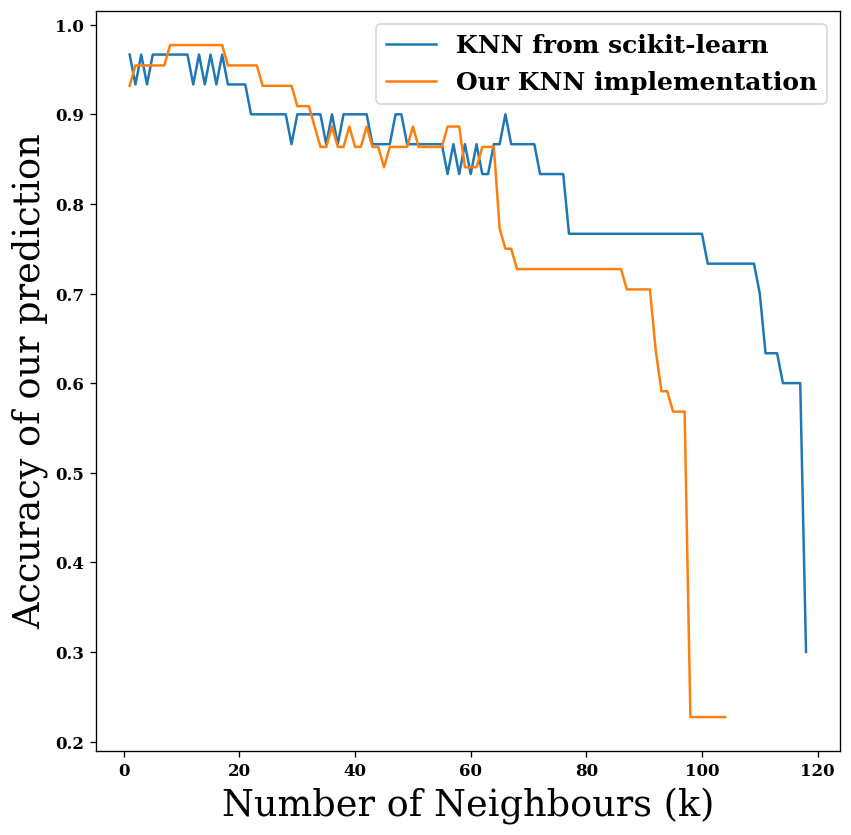

In [150]:
X_train, X_test, y_train, y_test = train_test_split(
    DATA, normalized_labels, test_size=0.2, random_state=150
)
    

K_span = np.arange(1, len(X_train), 1)
accuracy = np.zeros(len(K_span))

for i, k in enumerate(K_span):

    KNN = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
    KNN.fit(X_train, y_train)
    
    accuracy[i] = KNN.score(X_test, y_test)

fig_training_frac_accuracy = plt.figure(figsize=(8, 8))

plt.plot(K_span, accuracy, label = "KNN from scikit-learn")
plt.plot(k_2, _acc_2, label="Our KNN implementation")

    
plt.xlabel(r"Number of Neighbours (k)", fontsize = 22)
plt.ylabel(r"Accuracy of our prediction", fontsize = 22)


plt.legend(fontsize=15)

plt.show()

As you can see our implementation performance is fairly close to the performance of the KNN from the `scikit-learn` library.

# References:


* https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html)  

* [https://en.wikipedia.org/wiki/Cluster_analysis](https://en.wikipedia.org/wiki/Cluster_analysis)  

* [https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)  

* [https://en.wikipedia.org/wiki/Iris_flower_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set)


* [https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


* [https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)  

* [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)